Abhishek Anand | HCDE 598 A – Special Topics 

# Data Science for User Experience Researchers  

## TV series and Novel Series Popularity - Games of Thrones

## Overview:
Recently entertainment industry has achieved a great success with TV/ Movie adaption of popular Novel series. This trend has escalated to a quite a few  titles. In case I would like to see measure the popularity of any novel series with the hypothesis, the trend in the number of revision to the articles denotes the popularity of the book series. Keeping the similar viewpoint, measure the popularity with for its TV series.

Gathering, cleaning, integrating, restructuring,transforming, loading, filtering, deleting, combining, verifying, extracting, shaping, massaging, Identifying, exploring, hypothesizing about, analyzing, understanding, validating 

## Scope:
To keep the scope of the project manageable within the timeframe of this quarter, I will be focusing on the main page for the TV series and the Novel Series.  Collection of data will be done using Wikipedia API from the date of page creation to the premier date of Season Six Release date: April 24, 2016 00:00:00 UTC     
Comparing revision on Wikipedia article for TV series and Books with respect to their release. 

### Data Set and API:
* The TV series:  https://en.wikipedia.org/wiki/Game_of_Thrones 
* The novel series:  https://en.wikipedia.org/wiki/A_Song_of_Ice_and_Fire 

Data will be collected using Wikipedia API. Initially I am planning to capture two fields userid and timestamp of all the revision (edits) created since the inception of the article. I am looking at dataset from correlation perspective with respective to each other as how edits pattern varied.  Another important data point I am looking is the publication date of Books in the series and first air dates of TV series. According to available information, first book in the series was released on August 1996 and First season in the series was aired on 17th April 2011. 


#### Get Data for TV Series of Games of Thrones in CSV and TSV format 

In [1]:
import requests

# Revisions for TV Series Games of Thrones 

# parameter version which makes a little more sense
parameters = {'action' : 'query',
              'prop' : 'revisions',
              'titles' : 'Game of Thrones',
              'rvlimit' : 500,
              'rvprop' : "timestamp|userid",
              'format' : 'json',
              'continue' : ''}

# /w/api.php?action=query&format=json&prop=revisions&list=&titles=Game+of+Thrones&rvprop=timestamp%7Cuser%7Cuserid&rvlimit=20&rvstart=2008-12-15T21%3A57%3A16.000Z&rvdir=newer

TVApiCallcount = 0
TVRevCount =0

OUTPUT_FILE = "revTvGot.tsv"
with open(OUTPUT_FILE, "w") as ofile:
    ofile.write("userid" + "\t" + "timestamp" + "\n")
    while True:
        wp_call = requests.get('https://en.wikipedia.org/w/api.php', params=parameters)
        response = wp_call.json()
        #print(parameters)
       
        TVApiCallcount += 1 

        for page_id in response["query"]["pages"].keys():
            #page_title = response["query"]["pages"][page_id]["title"]
            revisions = response["query"]["pages"][page_id]["revisions"]

            for rev in revisions:
                #print(str(rev["userid"]) + "\t" + rev["timestamp"])
                ofile.write(str(rev["userid"]) + "\t" + rev["timestamp"] + "\n")
                TVRevCount += 1
                #ofile.write(str(i) + "\t" + n[0] + "\t" + n[1] + "\n")

        if 'continue' in response:
            parameters.update(response['continue'])
        else:
            break

print ("No of times API Call has been made", TVApiCallcount)
print ("Number of Revision made to the TV series Page ", TVRevCount)           
print("Done")

No of times API Call has been made 12
Number of Revision made to the TV series Page  5554
Done


Data Collected from above code snippet using wikipedia API: (In TSV format ) https://raw.githubusercontent.com/abhishekanand/DS4UX/master/final/revTvGot.tsv 

In [2]:
import requests

# Revisions for TV Series Games of Thrones 

# parameter version which makes a little more sense
parameters = {'action' : 'query',
              'prop' : 'revisions',
              'titles' : 'Game of Thrones',
              'rvlimit' : 500,
              'rvprop' : "timestamp|userid",
              'format' : 'json',
              'continue' : ''}

# /w/api.php?action=query&format=json&prop=revisions&list=&titles=Game+of+Thrones&rvprop=timestamp%7Cuser%7Cuserid&rvlimit=20&rvstart=2008-12-15T21%3A57%3A16.000Z&rvdir=newer

count = 0

OUTPUT_FILE = "revTvGot.csv"
with open(OUTPUT_FILE, "w") as ofile:
    ofile.write("userid" + "," + "timestamp" + "\n")
    while True:
        wp_call = requests.get('https://en.wikipedia.org/w/api.php', params=parameters)
        response = wp_call.json()
        #print(parameters)
       
        count += 1 

        for page_id in response["query"]["pages"].keys():
            #page_title = response["query"]["pages"][page_id]["title"]
            revisions = response["query"]["pages"][page_id]["revisions"]

            for rev in revisions:
                #print(str(rev["userid"]) + "\t" + rev["timestamp"])
                ofile.write(str(rev["userid"]) + "," + rev["timestamp"] + "\n")
                #ofile.write(str(i) + "\t" + n[0] + "\t" + n[1] + "\n")

        if 'continue' in response:
            parameters.update(response['continue'])
        else:
            break

print(count)            
print("Done")

12
Done


Data Collected from above code snippet using wikipedia API (In CSV format )  :https://raw.githubusercontent.com/abhishekanand/DS4UX/master/final/revTvGot.csv 

#### Get Data for Book Series of  A Song of Ice and Fire in CSV and TSV format 

In [3]:
import requests

# Revisions for Book Series A Song of Ice and Fire 

# parameter version which makes a little more sense
parameters = {'action' : 'query',
              'prop' : 'revisions',
              'titles' : 'A Song of Ice and Fire',
              'rvlimit' : 500,
              'rvprop' : "timestamp|userid",
              'format' : 'json',
              'continue' : ''}

# /w/api.php?action=query&format=json&prop=revisions&list=&titles=Game+of+Thrones&rvprop=timestamp%7Cuser%7Cuserid&rvlimit=20&rvstart=2008-12-15T21%3A57%3A16.000Z&rvdir=newer

BookApiCallcount = 0
BookRevCount = 0 
OUTPUT_FILE = "revBookSif.tsv"
with open(OUTPUT_FILE, "w") as ofile:
    ofile.write("userid" + "\t" + "timestamp" + "\n")
    while True:
        wp_call = requests.get('https://en.wikipedia.org/w/api.php', params=parameters)
        response = wp_call.json()
        #print(parameters)
       
        BookApiCallcount += 1 

        for page_id in response["query"]["pages"].keys():
            #page_title = response["query"]["pages"][page_id]["title"]
            revisions = response["query"]["pages"][page_id]["revisions"]

            for rev in revisions:
                #print(str(rev["userid"]) + "\t" + rev["timestamp"])
                ofile.write(str(rev["userid"]) + "\t" + rev["timestamp"] + "\n")
                BookRevCount += 1
                #ofile.write(str(i) + "\t" + n[0] + "\t" + n[1] + "\n")

        if 'continue' in response:
            parameters.update(response['continue'])
        else:
            break

print ("No of times API Call has been made", BookApiCallcount)
print (" Number of Revision made to the TV series Page ", BookRevCount)            
print("Done")

No of times API Call has been made 6
 Number of Revision made to the TV series Page  2573
Done


Data Collected from above code snippet using wikipedia API: (In TSV format ) : https://raw.githubusercontent.com/abhishekanand/DS4UX/master/final/revBookSif.tsv

In [4]:
import requests

# Revisions for Book Series A Song of Ice and Fire 

# parameter version which makes a little more sense
parameters = {'action' : 'query',
              'prop' : 'revisions',
              'titles' : 'A Song of Ice and Fire',
              'rvlimit' : 500,
              'rvprop' : "timestamp|userid",
              'format' : 'json',
              'continue' : ''}

# /w/api.php?action=query&format=json&prop=revisions&list=&titles=Game+of+Thrones&rvprop=timestamp%7Cuser%7Cuserid&rvlimit=20&rvstart=2008-12-15T21%3A57%3A16.000Z&rvdir=newer

count = 0

OUTPUT_FILE = "revBookSif.csv"
with open(OUTPUT_FILE, "w") as ofile:
    ofile.write("userid" + "," + "timestamp" + "\n")
    while True:
        wp_call = requests.get('https://en.wikipedia.org/w/api.php', params=parameters)
        response = wp_call.json()
        #print(parameters)
       
        count += 1 

        for page_id in response["query"]["pages"].keys():
            #page_title = response["query"]["pages"][page_id]["title"]
            revisions = response["query"]["pages"][page_id]["revisions"]

            for rev in revisions:
                #print(str(rev["userid"]) + "\t" + rev["timestamp"])
                ofile.write(str(rev["userid"]) + "," + rev["timestamp"] + "\n")
                #ofile.write(str(i) + "\t" + n[0] + "\t" + n[1] + "\n")

        if 'continue' in response:
            parameters.update(response['continue'])
        else:
            break

print(count)            
print("Done")

6
Done


Data Collected from above code snippet using wikipedia API: (In CSV format ) : https://raw.githubusercontent.com/abhishekanand/DS4UX/master/final/revBookSif.csv

#### Now we have collected Revision data for both Book and TV series :

In CSV format  :
* TV Series Data  : revTvGot.csv
* BookSeries Data  : revBookSif.csv

In TSV format 
* TV series Data : revTvGot.tsv
* Book Series Data :revBookSif.tsv

#### Converting both data set Json 
 1. Reading from revTvGot.csv and  Writing to revTvGot.json
 2. Reading from revBookSif.csv and  Writing to revBookSif.json

In [5]:
import csv
import json

tvcsvfile = open('revTvGot.csv', 'r')
tvjsonfile = open('revTvGot.json', 'w')

readertv = csv.DictReader(tvcsvfile)
outtv = json.dumps([row for row in readertv])
tvjsonfile.write(outtv)

bookcsvfile = open('revBookSif.csv', 'r')
bookjsonfile = open('revBookSif.json', 'w')

readerbook = csv.DictReader(bookcsvfile)
outbook = json.dumps([row for row in readerbook])
bookjsonfile.write(outbook)


147768

To establish a timline, based on data collected  
* Novel Series Page was created on  : 2001-06-15T17:16:54Z
* TV Series Page was created on     : 2008-12-15T22:04:16Z


In [6]:
print("Since creation of Wikipedia Page for TV Series and Novel Series there has been "+ str(TVRevCount)+ "TV Edits and " + str(BookRevCount)+"Novel Series edits" )

Since creation of Wikipedia Page for TV Series and Novel Series there has been 5554TV Edits and 2573Novel Series edits


##### TV series Season Timeline - Ordered Date/ First Aired Date/Last Aired Date

These data points were manually created based on infomation present in the TV series Wikipedia pages  

In [7]:
TVTimeLine = {}
TVTimeLine["season1"]={"ordered":"03/02/2010","FirstAired":"04/17/2011","LastAired":"06/19/2011"}
TVTimeLine["season2"]={"ordered":"04/19/2011","FirstAired":"04/01/2012","LastAired":"06/03/2012"}
TVTimeLine["season3"]={"ordered":"04/10/2012","FirstAired":"03/31/2013","LastAired":"06/09/2013"}
TVTimeLine["season4"]={"ordered":"04/02/2013","FirstAired":"04/06/2014","LastAired":"06/15/2014"}
TVTimeLine["season5"]={"ordered":"04/08/2014","FirstAired":"04/12/2015","LastAired":"06/14/2015"}
TVTimeLine["season6"]={"ordered":"04/08/2014","FirstAired":"04/24/2016","LastAired":"06/26/2016"}
TVTimeLine["season7"]={"ordered":"04/21/2016","FirstAired":"2017","LastAired":"2017"}


In [8]:
print(json.dumps(TVTimeLine, indent = 4 ))

{
    "season4": {
        "ordered": "04/02/2013",
        "LastAired": "06/15/2014",
        "FirstAired": "04/06/2014"
    },
    "season1": {
        "ordered": "03/02/2010",
        "LastAired": "06/19/2011",
        "FirstAired": "04/17/2011"
    },
    "season3": {
        "ordered": "04/10/2012",
        "LastAired": "06/09/2013",
        "FirstAired": "03/31/2013"
    },
    "season6": {
        "ordered": "04/08/2014",
        "LastAired": "06/26/2016",
        "FirstAired": "04/24/2016"
    },
    "season7": {
        "ordered": "04/21/2016",
        "LastAired": "2017",
        "FirstAired": "2017"
    },
    "season2": {
        "ordered": "04/19/2011",
        "LastAired": "06/03/2012",
        "FirstAired": "04/01/2012"
    },
    "season5": {
        "ordered": "04/08/2014",
        "LastAired": "06/14/2015",
        "FirstAired": "04/12/2015"
    }
}


##### Novel series Book Timeline -  Release Date 

These data points were manually created based on infomation present in the Novel  series Wikipedia pages  

#### Yearly Revision on the TV Series and Book Series 

In [9]:
tvFin = open('revTvGot.json', "r")
tvrevisions = json.load(tvFin)
#print(json.dumps(revisions, indent = 4 ))

# ===========
tvyears = {}
for revision in tvrevisions:
    year = revision['timestamp'][0:4]
    if year in tvyears.keys():
        tvyears[year] += 1
    else:
        tvyears[year] = {}
        tvyears[year] = 1

print("TV series Edits")
print(json.dumps(tvyears, indent = 4 ))


bookFin = open('revBookSif.json', "r")
bookrevisions = json.load(bookFin)
#print(json.dumps(revisions, indent = 4 ))

# ===========
bookyears = {}
for revision in bookrevisions:
    year = revision['timestamp'][0:4]
    if year in bookyears.keys():
        bookyears[year] += 1
    else:
        bookyears[year] = {}
        bookyears[year] = 1
        
print("Book series Edits")
print(json.dumps(bookyears, indent = 4 ))

TV series Edits
{
    "2013": 1044,
    "2016": 264,
    "2008": 21,
    "2010": 308,
    "2009": 331,
    "2011": 989,
    "2015": 797,
    "2012": 1065,
    "2014": 735
}
Book series Edits
{
    "2013": 204,
    "2003": 11,
    "2002": 1,
    "2010": 142,
    "2006": 179,
    "2015": 159,
    "2012": 484,
    "2014": 204,
    "2007": 210,
    "2008": 152,
    "2016": 72,
    "2001": 1,
    "2005": 145,
    "2009": 178,
    "2011": 393,
    "2004": 38
}


### Sorting Dictionary  - Year Value 

In [10]:

# http://stackoverflow.com/a/9001529
# http://stackoverflow.com/a/15743140

import collections

odtvyears = collections.OrderedDict(sorted(tvyears.items(),reverse=True))
print(odtvyears)

odbookyears = collections.OrderedDict(sorted(bookyears.items(),reverse=True))
print(odbookyears)

TVTimeLine = collections.OrderedDict(sorted(TVTimeLine.items()))
print(TVTimeLine)


OrderedDict([('2016', 264), ('2015', 797), ('2014', 735), ('2013', 1044), ('2012', 1065), ('2011', 989), ('2010', 308), ('2009', 331), ('2008', 21)])
OrderedDict([('2016', 72), ('2015', 159), ('2014', 204), ('2013', 204), ('2012', 484), ('2011', 393), ('2010', 142), ('2009', 178), ('2008', 152), ('2007', 210), ('2006', 179), ('2005', 145), ('2004', 38), ('2003', 11), ('2002', 1), ('2001', 1)])
OrderedDict([('season1', {'ordered': '03/02/2010', 'LastAired': '06/19/2011', 'FirstAired': '04/17/2011'}), ('season2', {'ordered': '04/19/2011', 'LastAired': '06/03/2012', 'FirstAired': '04/01/2012'}), ('season3', {'ordered': '04/10/2012', 'LastAired': '06/09/2013', 'FirstAired': '03/31/2013'}), ('season4', {'ordered': '04/02/2013', 'LastAired': '06/15/2014', 'FirstAired': '04/06/2014'}), ('season5', {'ordered': '04/08/2014', 'LastAired': '06/14/2015', 'FirstAired': '04/12/2015'}), ('season6', {'ordered': '04/08/2014', 'LastAired': '06/26/2016', 'FirstAired': '04/24/2016'}), ('season7', {'ordere

## Displaying Total Number of edits on Yearly Basis  

### For TV Series 

OrderedDict([('2016', 264), ('2015', 797), ('2014', 735), ('2013', 1044), ('2012', 1065), ('2011', 989), ('2010', 308), ('2009', 331), ('2008', 21)])


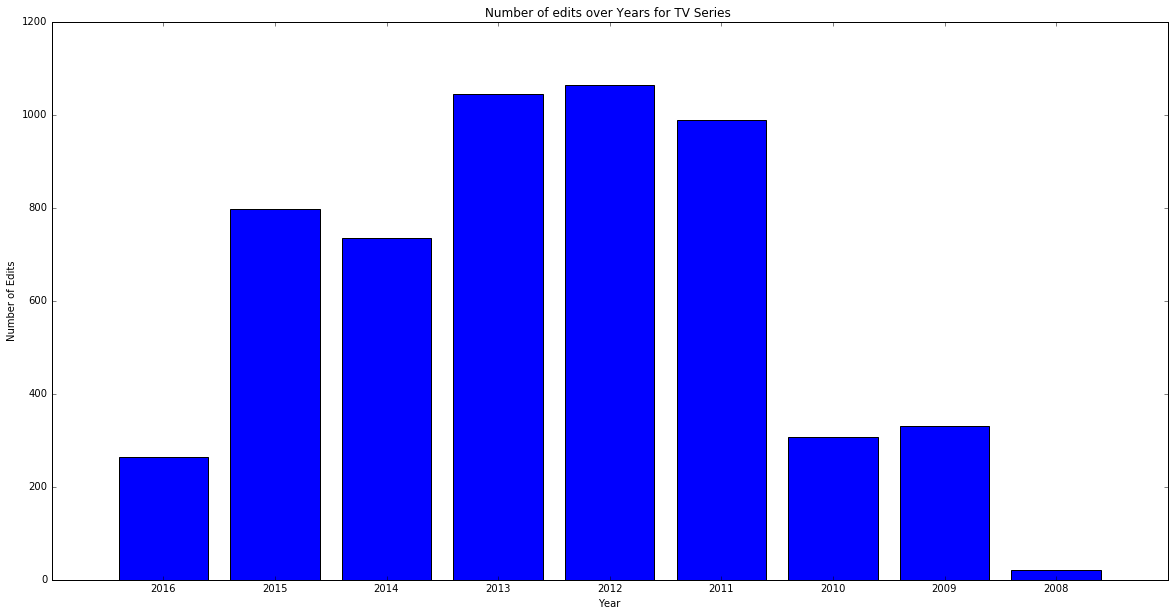

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)  # http://stackoverflow.com/a/36287569 

plt.bar(range(len(odtvyears)), odtvyears.values(), align='center')
plt.xticks(range(len(odtvyears)), odtvyears.keys())
print(odtvyears)
#labels
plt.xlabel("Year")
plt.ylabel("Number of Edits")

#title
plt.title("Number of edits over Years for TV Series ")

plt.show()


Above graph titled *Number of edits over Years for TV Series* contians  totla number of edits performed on yearly basis with highest number of edits of 1065 in 2012 .  

### For Novel Series 

OrderedDict([('2016', 72), ('2015', 159), ('2014', 204), ('2013', 204), ('2012', 484), ('2011', 393), ('2010', 142), ('2009', 178), ('2008', 152), ('2007', 210), ('2006', 179), ('2005', 145), ('2004', 38), ('2003', 11), ('2002', 1), ('2001', 1)])


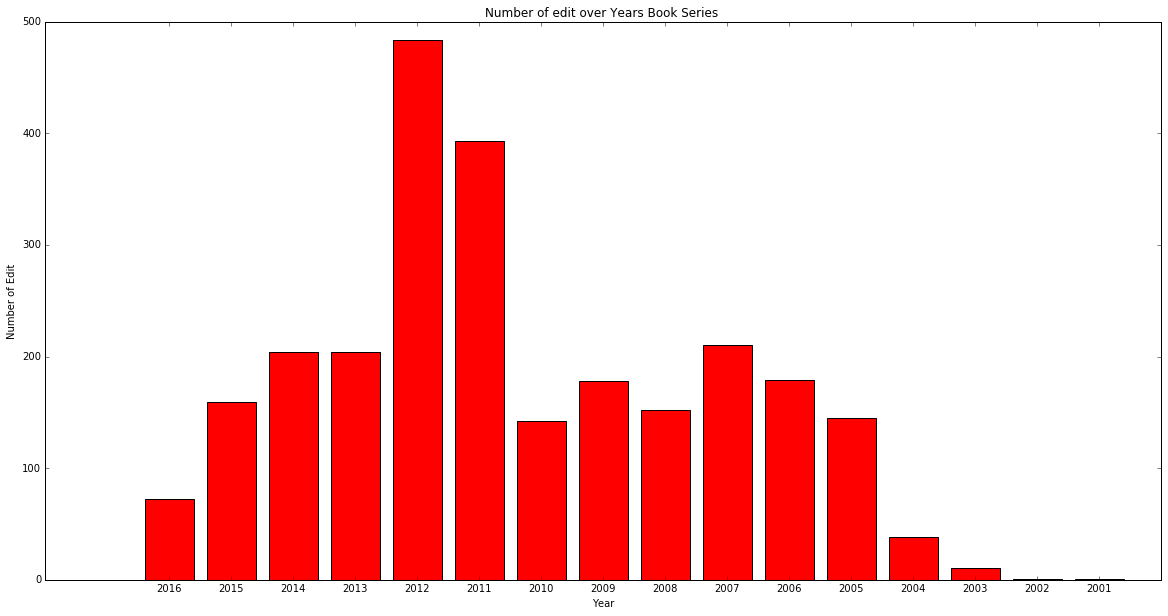

In [12]:

plt.bar(range(len(odbookyears)), odbookyears.values(), align='center', color ='red')
plt.xticks(range(len(odbookyears)),odbookyears.keys() )

#labels
plt.xlabel("Year")
plt.ylabel("Number of Edit")

#title
plt.title("Number of edit over Years Book Series ")
print(odbookyears)
# fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

plt.show()

Above graph titled *Number of edit over Years Novel Series* contians  totla number of edits performed on yearly basis with highest number of edits of 484 in 2012 .  

### Merging Data Points in one Grpah for TV Series and Novel Series 

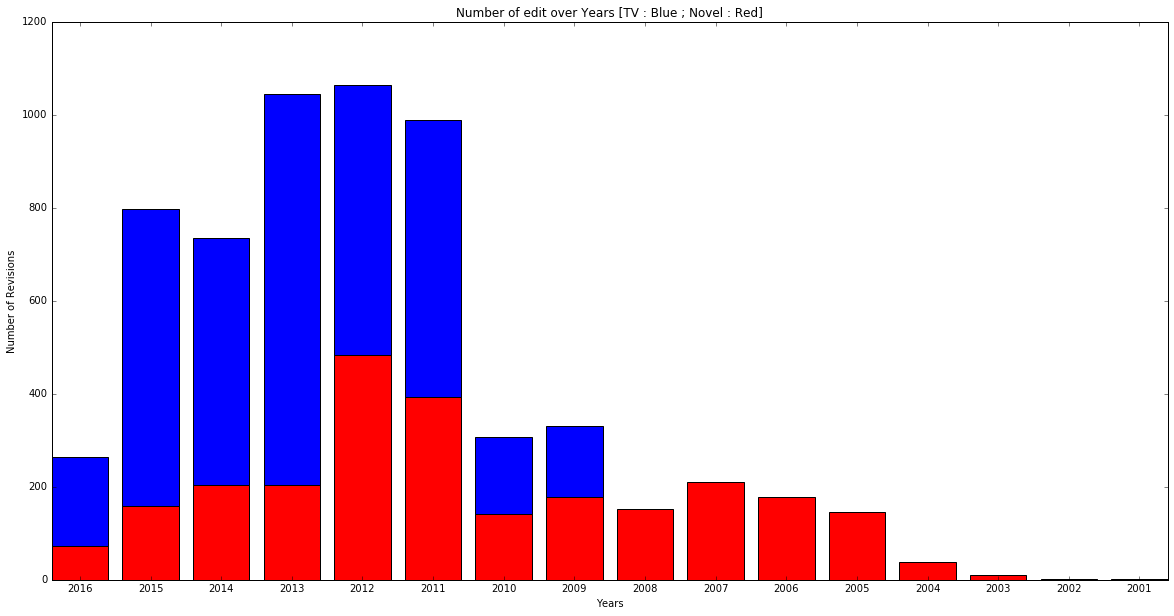

TV sreies Edit in Blue 
 OrderedDict([('2016', 264), ('2015', 797), ('2014', 735), ('2013', 1044), ('2012', 1065), ('2011', 989), ('2010', 308), ('2009', 331), ('2008', 21)])
Book sreies Edit in Red 
 OrderedDict([('2016', 72), ('2015', 159), ('2014', 204), ('2013', 204), ('2012', 484), ('2011', 393), ('2010', 142), ('2009', 178), ('2008', 152), ('2007', 210), ('2006', 179), ('2005', 145), ('2004', 38), ('2003', 11), ('2002', 1), ('2001', 1)])


In [13]:
plt.bar(range(len(odtvyears)), odtvyears.values(), align='center')
plt.xticks(range(len(odtvyears)), odtvyears.keys())

plt.bar(range(len(odbookyears)), odbookyears.values(), align='center', color ='red')
plt.xticks(range(len(odbookyears)),odbookyears.keys() )

#labels
plt.xlabel("Years")
plt.ylabel("Number of Revisions")

#title
plt.title("Number of edit over Years [TV : Blue ; Novel : Red]")



plt.show()
print("TV sreies Edit in Blue \n",odtvyears)
print("Book sreies Edit in Red \n",odbookyears)

Observation  : 
* Both TV series and Novel Series has  highest number of edits in year 2012 (TV : 1065 | Novel Sereis : 484). 
* Novel Series page was created 7 years prior to TV series. 
* Wikipedia was Founded on 
* First Book of the Novel Series was released on 
* First Season of the TV Series was aired on 
* Only in year 2008,where both pages exitsted only TV series had less edits compared to Book Series (TV : 21 | Novel Sereis : 152).


#### Line Graph 

#### Monthly Revision on the TV Series and Book Series 

In [14]:
# ===========
tvmonths = {}
for revision in tvrevisions:
    month = revision['timestamp'][0:7]
    if month in tvmonths.keys():
        tvmonths[month] += 1
    else:
        tvmonths[month] = {}
        tvmonths[month] = 1

#print(json.dumps(tvmonths, indent = 4 ))


# ===========
bookmonths = {}
for revision in bookrevisions:
    month = revision['timestamp'][0:7]
    if month in bookmonths.keys():
        bookmonths[month] += 1
    else:
        bookmonths[month] = {}
        bookmonths[month] = 1

#print(json.dumps(bookmonths, indent = 4 ))


# Anonymous  Edits Data Set 

In [15]:
# ===========
TVAnTimestamp = []
TVAnCount = 0;
for revision in tvrevisions:
    if revision['userid'] == '0':
        print(revision['userid'] + " |" +revision['timestamp'])
        TVAnCount += 1
print("Anonymous Edit Count:" + str(TVAnCount))
#print(json.dumps(tvmonths, indent = 4 ))

# ===========
BookAnTimestamp = []
BookAnCount = 0;
for revision in bookrevisions:
    if revision['userid'] == '0':
        print(revision['userid'] + " |" +revision['timestamp'])
        BookAnCount += 1
print("Anonymous Edit Count:" + str(BookAnCount))
#print(json.dumps(tvmonths, indent = 4 ))


0 |2016-06-08T01:38:39Z
0 |2016-06-07T04:36:59Z
0 |2016-06-06T07:09:51Z
0 |2016-06-06T06:59:03Z
0 |2016-06-06T04:24:10Z
0 |2016-06-06T04:22:40Z
0 |2016-06-06T04:14:13Z
0 |2016-06-06T04:10:50Z
0 |2016-06-05T13:15:19Z
0 |2016-06-05T03:07:53Z
0 |2015-06-05T01:19:38Z
0 |2015-06-05T01:15:52Z
0 |2015-06-05T01:15:25Z
0 |2015-06-05T01:14:41Z
0 |2015-06-05T01:11:42Z
0 |2015-06-05T01:08:26Z
0 |2015-06-05T01:07:27Z
0 |2015-06-05T01:06:18Z
0 |2015-06-05T01:05:36Z
0 |2015-06-05T01:04:09Z
0 |2015-06-05T01:02:42Z
0 |2015-06-05T01:00:15Z
0 |2015-06-05T00:59:13Z
0 |2015-06-05T00:58:12Z
0 |2015-06-05T00:46:02Z
0 |2015-06-05T00:43:22Z
0 |2015-06-05T00:41:25Z
0 |2015-06-04T13:31:38Z
0 |2015-06-04T07:09:57Z
0 |2015-06-02T18:48:19Z
0 |2015-05-31T16:02:59Z
0 |2015-05-31T08:34:18Z
0 |2015-05-31T08:31:48Z
0 |2015-05-29T02:45:21Z
0 |2015-05-28T03:20:18Z
0 |2015-05-28T03:19:41Z
0 |2015-05-26T23:00:53Z
0 |2015-05-26T22:58:27Z
0 |2015-05-25T19:01:17Z
0 |2015-05-25T05:36:56Z
0 |2015-05-23T21:52:33Z
0 |2015-05-23T13

In [16]:

# http://stackoverflow.com/a/9001529

import collections

odtvmonths = collections.OrderedDict(sorted(tvmonths.items(),reverse=True))
print(odtvmonths)

odbookmonths = collections.OrderedDict(sorted(bookmonths.items(), reverse=True))
print(odbookmonths)


OrderedDict([('2016-06', 27), ('2016-05', 63), ('2016-04', 78), ('2016-03', 22), ('2016-02', 29), ('2016-01', 45), ('2015-12', 32), ('2015-11', 25), ('2015-10', 33), ('2015-09', 25), ('2015-08', 18), ('2015-07', 24), ('2015-06', 102), ('2015-05', 152), ('2015-04', 202), ('2015-03', 132), ('2015-02', 37), ('2015-01', 15), ('2014-12', 16), ('2014-11', 41), ('2014-10', 33), ('2014-09', 14), ('2014-08', 64), ('2014-07', 30), ('2014-06', 69), ('2014-05', 101), ('2014-04', 189), ('2014-03', 71), ('2014-02', 31), ('2014-01', 76), ('2013-12', 53), ('2013-11', 46), ('2013-10', 70), ('2013-09', 68), ('2013-08', 65), ('2013-07', 54), ('2013-06', 85), ('2013-05', 228), ('2013-04', 165), ('2013-03', 128), ('2013-02', 49), ('2013-01', 33), ('2012-12', 36), ('2012-11', 62), ('2012-10', 66), ('2012-09', 73), ('2012-08', 41), ('2012-07', 64), ('2012-06', 97), ('2012-05', 210), ('2012-04', 218), ('2012-03', 93), ('2012-02', 46), ('2012-01', 59), ('2011-12', 48), ('2011-11', 40), ('2011-10', 69), ('2011-

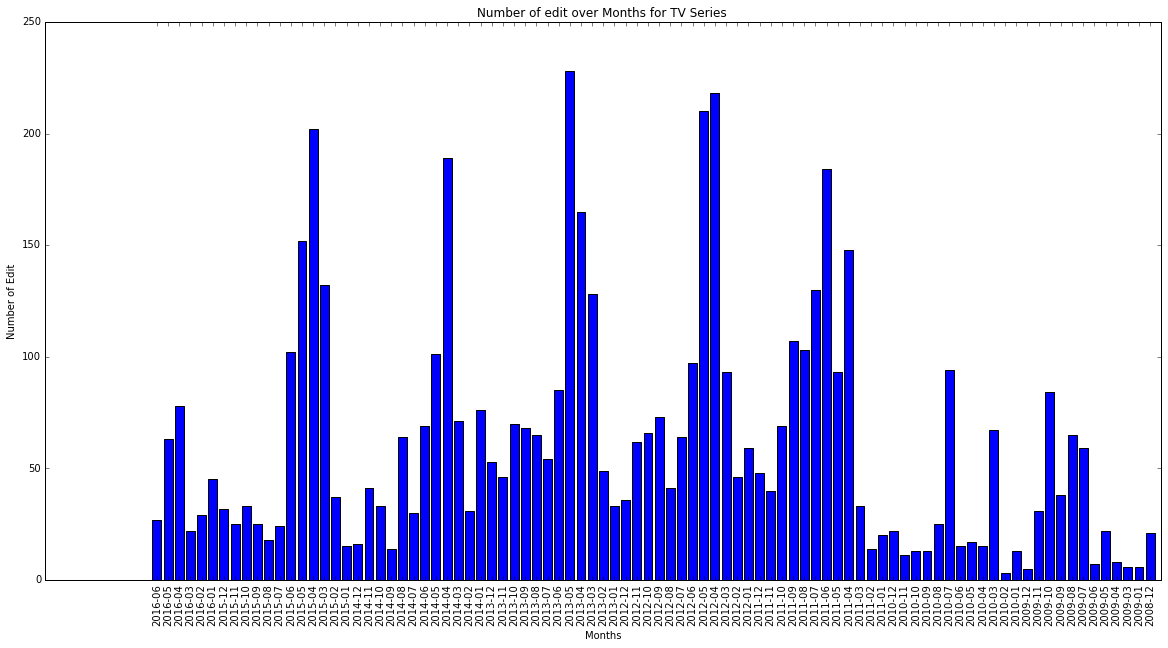

In [17]:


plt.bar(range(len(odtvmonths)), odtvmonths.values(), align='center')
plt.xticks(range(len(odtvmonths)), odtvmonths.keys(),rotation='vertical')

#labels
plt.xlabel("Months")
plt.ylabel("Number of Edit")

#title
plt.title("Number of edit over Months for TV Series ")

plt.show()
#print(odbookmonths)


In [18]:
print(json.dumps(odtvmonths, indent = 4 ))

{
    "2016-06": 27,
    "2016-05": 63,
    "2016-04": 78,
    "2016-03": 22,
    "2016-02": 29,
    "2016-01": 45,
    "2015-12": 32,
    "2015-11": 25,
    "2015-10": 33,
    "2015-09": 25,
    "2015-08": 18,
    "2015-07": 24,
    "2015-06": 102,
    "2015-05": 152,
    "2015-04": 202,
    "2015-03": 132,
    "2015-02": 37,
    "2015-01": 15,
    "2014-12": 16,
    "2014-11": 41,
    "2014-10": 33,
    "2014-09": 14,
    "2014-08": 64,
    "2014-07": 30,
    "2014-06": 69,
    "2014-05": 101,
    "2014-04": 189,
    "2014-03": 71,
    "2014-02": 31,
    "2014-01": 76,
    "2013-12": 53,
    "2013-11": 46,
    "2013-10": 70,
    "2013-09": 68,
    "2013-08": 65,
    "2013-07": 54,
    "2013-06": 85,
    "2013-05": 228,
    "2013-04": 165,
    "2013-03": 128,
    "2013-02": 49,
    "2013-01": 33,
    "2012-12": 36,
    "2012-11": 62,
    "2012-10": 66,
    "2012-09": 73,
    "2012-08": 41,
    "2012-07": 64,
    "2012-06": 97,
    "2012-05": 210,
    "2012-04": 218,
    "2012-03": 93,

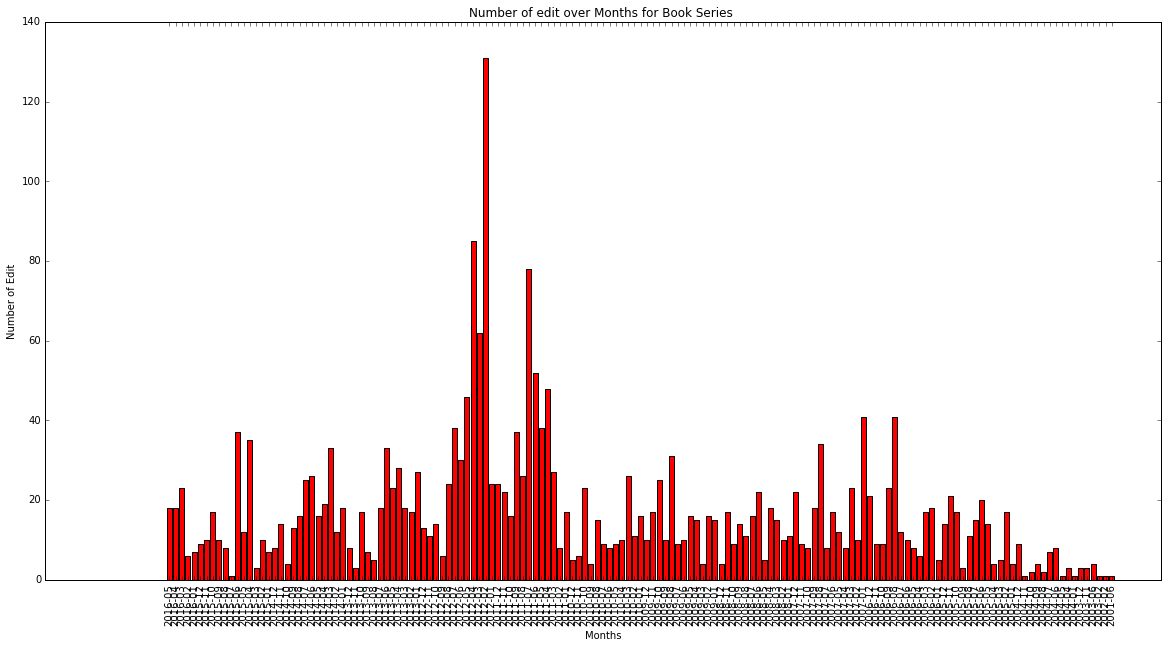

In [19]:
plt.bar(range(len(odbookmonths)), odbookmonths.values(), align='center', color = 'red')
plt.xticks(range(len(odbookmonths)), odbookmonths.keys(),rotation='vertical')

#labels
plt.xlabel("Months")
plt.ylabel("Number of Edit")

#title
plt.title("Number of edit over Months for Book Series ")

plt.show()

In [20]:
print(json.dumps(odbookmonths, indent = 4 ))

{
    "2016-05": 18,
    "2016-04": 18,
    "2016-03": 23,
    "2016-02": 6,
    "2016-01": 7,
    "2015-12": 9,
    "2015-11": 10,
    "2015-10": 17,
    "2015-09": 10,
    "2015-08": 8,
    "2015-07": 1,
    "2015-06": 37,
    "2015-05": 12,
    "2015-04": 35,
    "2015-03": 3,
    "2015-02": 10,
    "2015-01": 7,
    "2014-12": 8,
    "2014-11": 14,
    "2014-10": 4,
    "2014-09": 13,
    "2014-08": 16,
    "2014-07": 25,
    "2014-06": 26,
    "2014-05": 16,
    "2014-04": 19,
    "2014-03": 33,
    "2014-02": 12,
    "2014-01": 18,
    "2013-12": 8,
    "2013-11": 3,
    "2013-10": 17,
    "2013-09": 7,
    "2013-08": 5,
    "2013-07": 18,
    "2013-06": 33,
    "2013-05": 23,
    "2013-04": 28,
    "2013-03": 18,
    "2013-02": 17,
    "2013-01": 27,
    "2012-12": 13,
    "2012-11": 11,
    "2012-10": 14,
    "2012-09": 6,
    "2012-08": 24,
    "2012-07": 38,
    "2012-06": 30,
    "2012-05": 46,
    "2012-04": 85,
    "2012-03": 62,
    "2012-02": 131,
    "2012-01": 24,
    

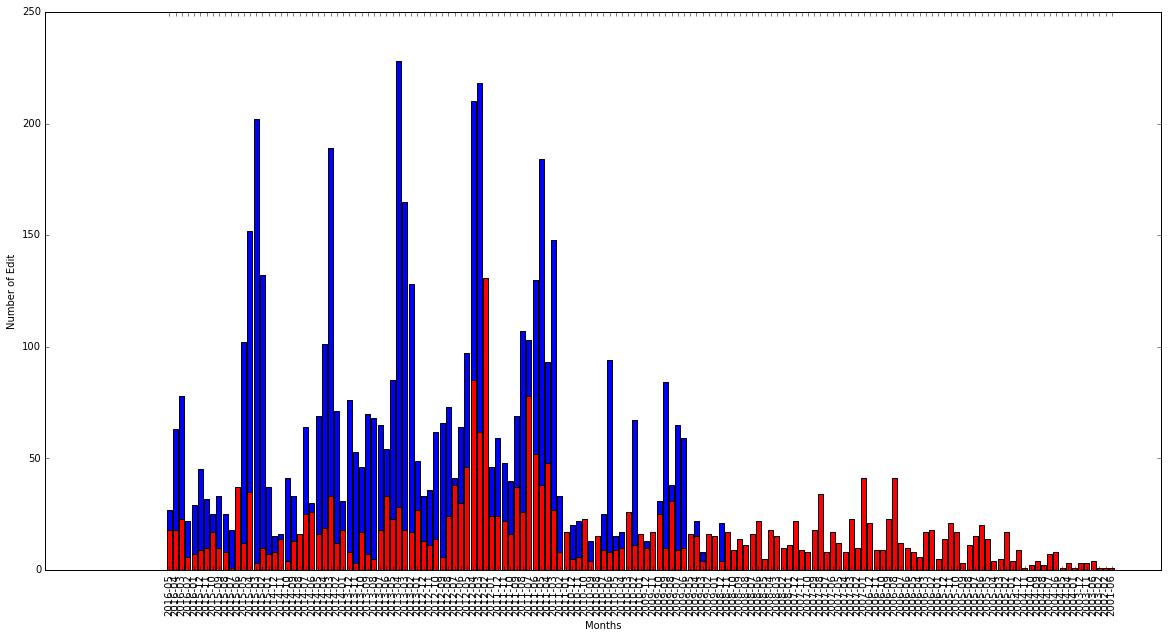

In [21]:
plt.bar(range(len(odtvmonths)), odtvmonths.values(), align='center')




plt.bar(range(len(odbookmonths)), odbookmonths.values(), align='center', color = 'red')
plt.xticks(range(len(odbookmonths)), odbookmonths.keys(),rotation='vertical')

#labels
plt.xlabel("Months")
plt.ylabel("Number of Edit")


plt.show()

In [22]:
import collections

odtvyears = collections.OrderedDict(sorted(tvyears.items()))
print(odtvyears)

OrderedDict([('2008', 21), ('2009', 331), ('2010', 308), ('2011', 989), ('2012', 1065), ('2013', 1044), ('2014', 735), ('2015', 797), ('2016', 264)])


#### Daily Revision on the TV Series and Book Series 

In [23]:
# ===========
tvdaily = {}
for revision in tvrevisions:
    day = revision['timestamp'][0:10]
    if day in tvdaily.keys():
        tvdaily[day] += 1
    else:
        tvdaily[day] = {}
        tvdaily[day] = 1

#print(json.dumps(tvdaily, indent = 4 ))

# ===========
bookdaily = {}
for revision in bookrevisions:
    day = revision['timestamp'][0:10]
    if day in bookdaily.keys():
        bookdaily[day] += 1
    else:
        bookdaily[day] = {}
        bookdaily[day] = 1

#print(json.dumps(bookdaily, indent = 4 ))

In [24]:
# http://stackoverflow.com/a/9001529

import collections

odtvdaily = collections.OrderedDict(sorted(tvdaily.items()))
print(odtvdaily)

odbookdaily = collections.OrderedDict(sorted(bookdaily.items()))
print(odbookdaily)

OrderedDict([('2008-12-15', 1), ('2008-12-16', 3), ('2008-12-26', 2), ('2008-12-29', 11), ('2008-12-30', 4), ('2009-01-03', 1), ('2009-01-20', 1), ('2009-01-28', 4), ('2009-03-03', 1), ('2009-03-05', 1), ('2009-03-07', 1), ('2009-03-19', 1), ('2009-03-23', 2), ('2009-04-14', 1), ('2009-04-17', 1), ('2009-04-21', 3), ('2009-04-22', 3), ('2009-05-06', 7), ('2009-05-11', 2), ('2009-05-12', 5), ('2009-05-18', 4), ('2009-05-22', 2), ('2009-05-26', 2), ('2009-06-04', 1), ('2009-06-05', 1), ('2009-06-12', 2), ('2009-06-15', 1), ('2009-06-18', 1), ('2009-06-22', 1), ('2009-07-16', 5), ('2009-07-17', 9), ('2009-07-20', 31), ('2009-07-21', 3), ('2009-07-23', 1), ('2009-07-24', 1), ('2009-07-27', 2), ('2009-07-28', 4), ('2009-07-29', 3), ('2009-08-04', 10), ('2009-08-05', 1), ('2009-08-06', 3), ('2009-08-07', 1), ('2009-08-10', 1), ('2009-08-11', 1), ('2009-08-15', 1), ('2009-08-19', 2), ('2009-08-21', 21), ('2009-08-22', 12), ('2009-08-23', 9), ('2009-08-24', 1), ('2009-08-27', 1), ('2009-08-28'

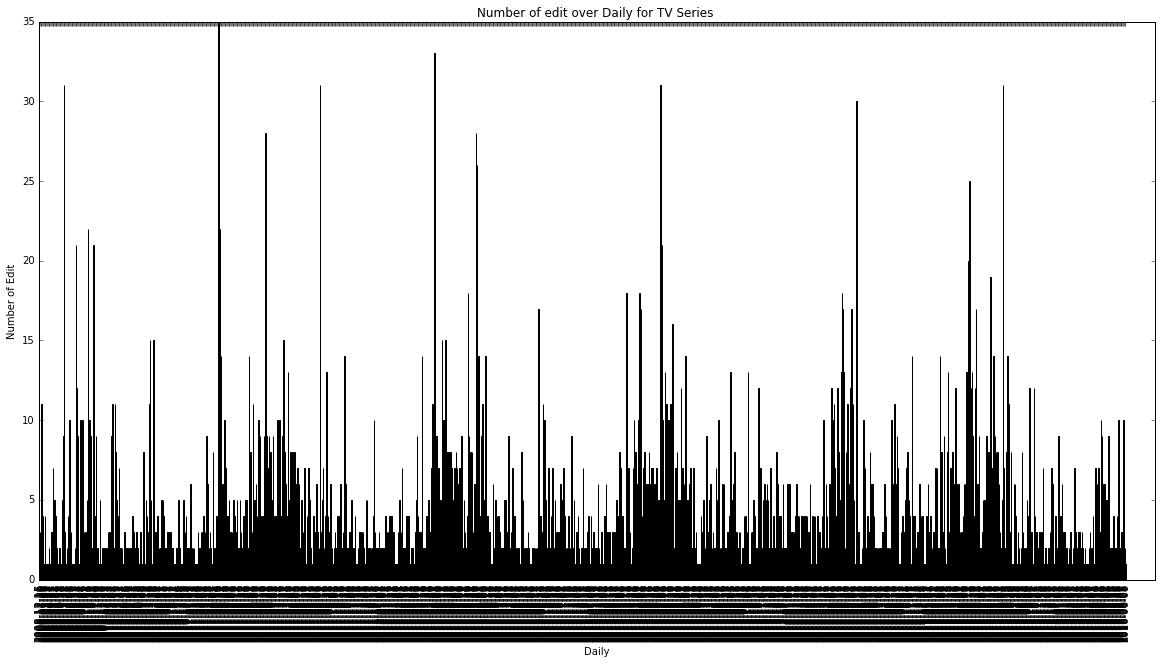

In [25]:
plt.bar(range(len(odtvdaily)), odtvdaily.values(), align='edge')
plt.xticks(range(len(odtvdaily)), odtvdaily.keys(),rotation='vertical')

#labels
plt.xlabel("Daily")
plt.ylabel("Number of Edit")

#title
plt.title("Number of edit over Daily for TV Series ")

plt.show()
#print(odbookmonths)


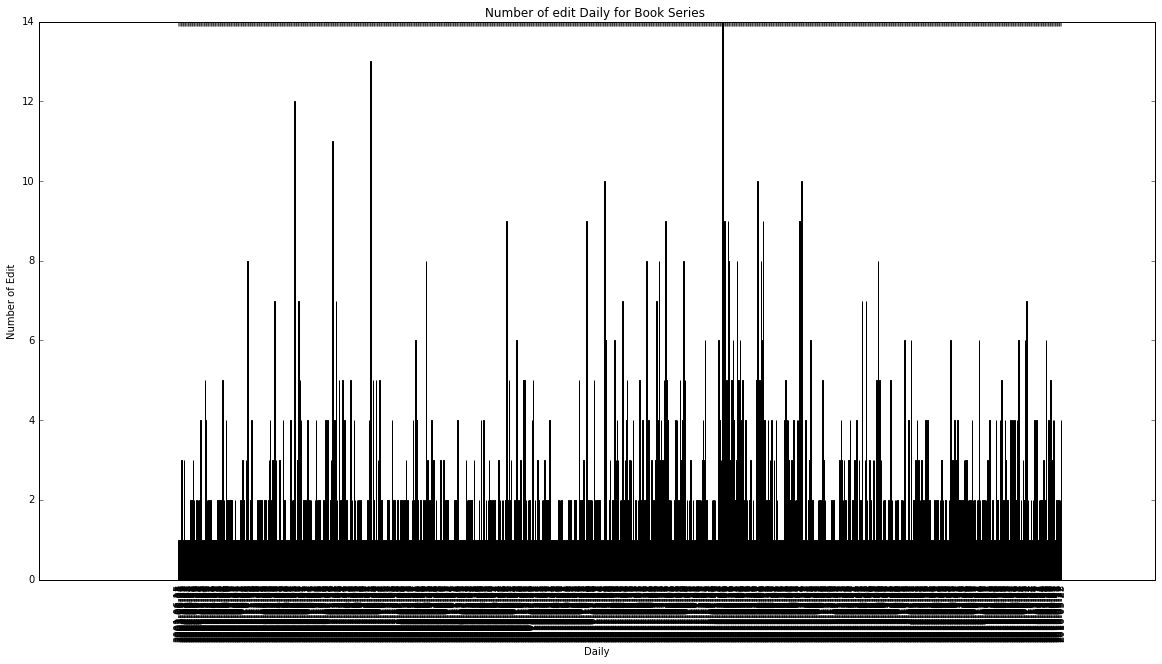

In [26]:

plt.bar(range(len(odbookdaily)), odbookdaily.values(), align='center')
plt.xticks(range(len(odbookdaily)), odbookdaily.keys(),rotation='vertical')

#labels
plt.xlabel("Daily")
plt.ylabel("Number of Edit")

#title
plt.title("Number of edit Daily for Book Series ")

plt.show()
#print(odbookmonths)


In [27]:
import datetime
import matplotlib.dates as dates
datetime.datetime.strptime("2008-09-03", "%Y-%m-%d")



datetime.datetime(2008, 9, 3, 0, 0)

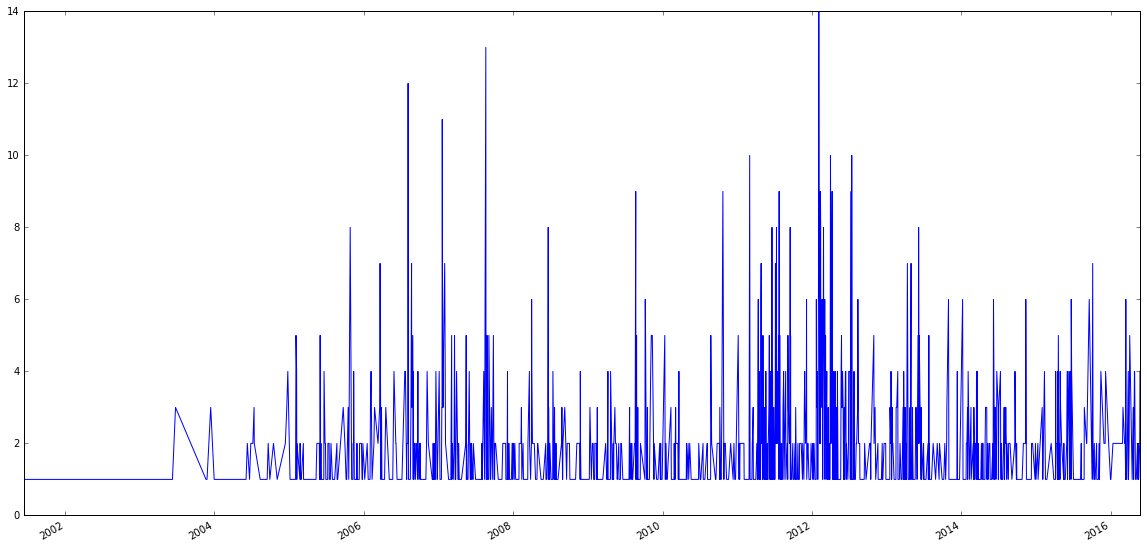

In [28]:
dates = []
y=[]
for key,value in odbookdaily.items():
    dates.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    y.append(value)
plt.plot(dates,y)
plt.gcf().autofmt_xdate()




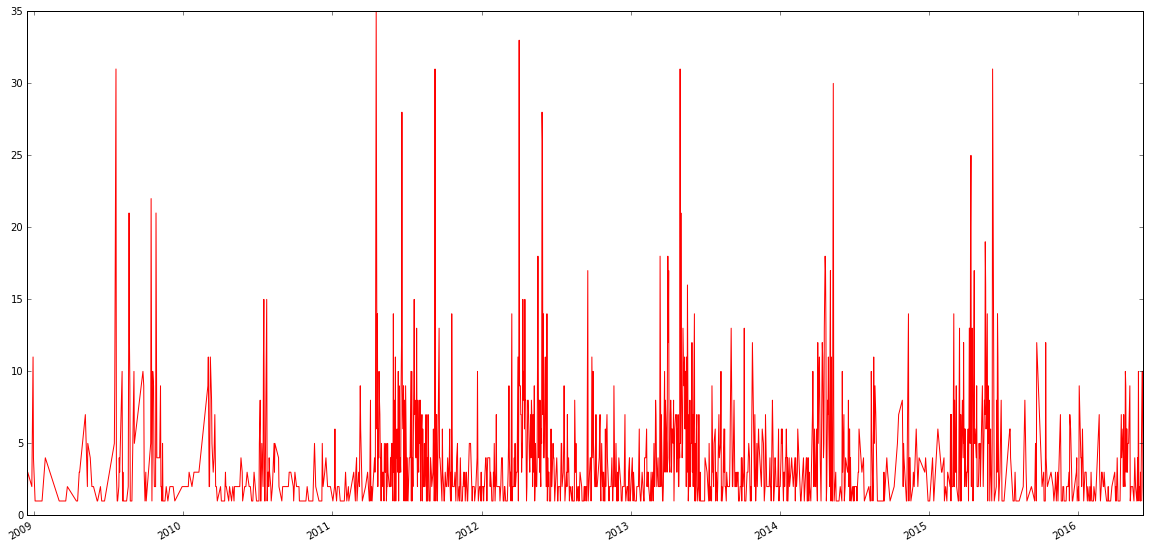

In [29]:
tvdates = []
tvy=[]
for key,value in odtvdaily.items():
    tvdates.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvy.append(value)
plt.plot(tvdates,tvy,color='red')
plt.gcf().autofmt_xdate()

In [30]:
TVTimeLineordered = {}
TVTimeLineordered["2010-03-02"]= 50
TVTimeLineordered["2011-04-19"]= 50
TVTimeLineordered["2012-04-10"]= 50
TVTimeLineordered["2013-04-02"]= 50
TVTimeLineordered["2014-04-08"]= 50
TVTimeLineordered["2014-04-08"]= 50
TVTimeLineordered["2016-04-21"]= 50



print(TVTimeLineordered)
odTVTimeLineordered = collections.OrderedDict(sorted(TVTimeLineordered.items()))
print(odTVTimeLineordered)

{'2016-04-21': 50, '2013-04-02': 50, '2010-03-02': 50, '2014-04-08': 50, '2011-04-19': 50, '2012-04-10': 50}
OrderedDict([('2010-03-02', 50), ('2011-04-19', 50), ('2012-04-10', 50), ('2013-04-02', 50), ('2014-04-08', 50), ('2016-04-21', 50)])


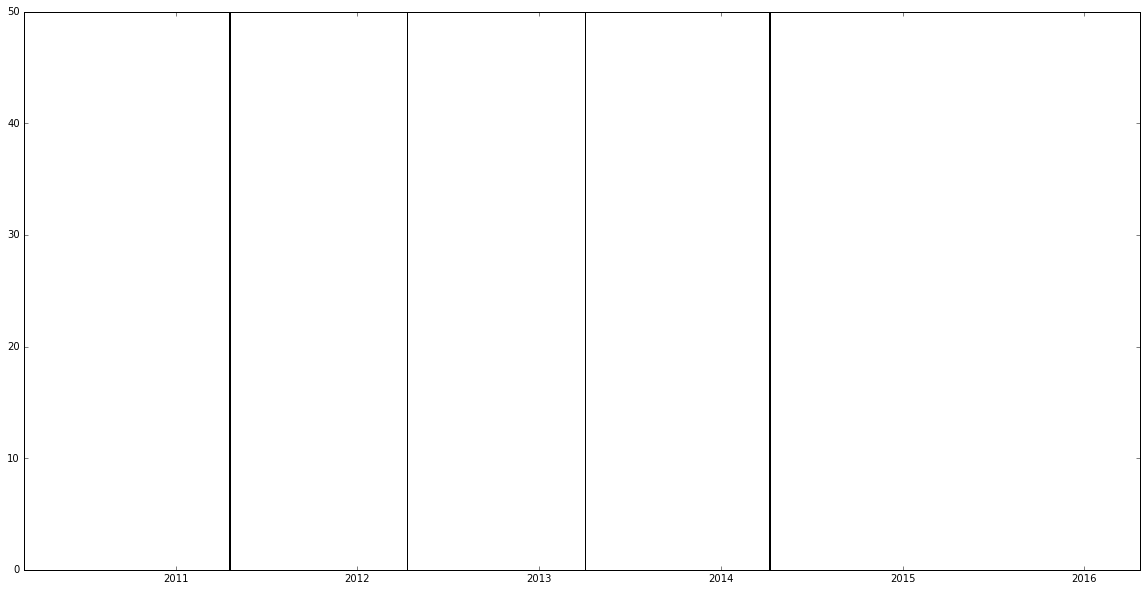

In [31]:

tvordered = []
tvo=[]
for key,value in odTVTimeLineordered.items():
    tvordered.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvo.append(value)
plt.bar(tvordered,tvo,color='green')
#plt.gcf().autofmt_xdate()



plt.show()

### Combining Graph 

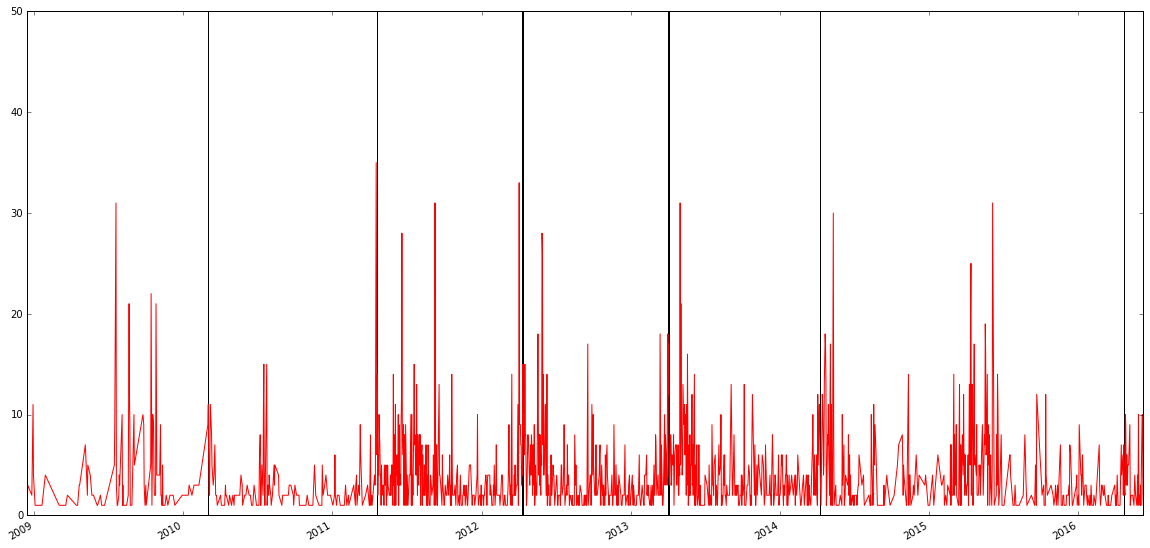

In [32]:
tvdates = []
tvy=[]
for key,value in odtvdaily.items():
    tvdates.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvy.append(value)
plt.plot(tvdates,tvy,color='red')
plt.gcf().autofmt_xdate()

tvordered = []
tvo=[]
for key,value in odTVTimeLineordered.items():
    tvordered.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvo.append(value)
plt.bar(tvordered,tvo,color='green')
plt.gcf().autofmt_xdate()



plt.show()

In [33]:
TVTimeLineFirstAired = {}
TVTimeLineFirstAired["2011-04-17"]= 40
TVTimeLineFirstAired["2012-04-01"]= 40
TVTimeLineFirstAired["2013-03-31"]= 40
TVTimeLineFirstAired["2014-04-06"]= 40
TVTimeLineFirstAired["2015-04-12"]= 40
TVTimeLineFirstAired["2016-04-24"]= 40
TVTimeLineFirstAired["2017-04-01"]= 40
print(TVTimeLineFirstAired)
odTVTimeLineFirstAired = collections.OrderedDict(sorted(TVTimeLineFirstAired.items()))
print(odTVTimeLineFirstAired)

{'2017-04-01': 40, '2012-04-01': 40, '2013-03-31': 40, '2016-04-24': 40, '2014-04-06': 40, '2011-04-17': 40, '2015-04-12': 40}
OrderedDict([('2011-04-17', 40), ('2012-04-01', 40), ('2013-03-31', 40), ('2014-04-06', 40), ('2015-04-12', 40), ('2016-04-24', 40), ('2017-04-01', 40)])


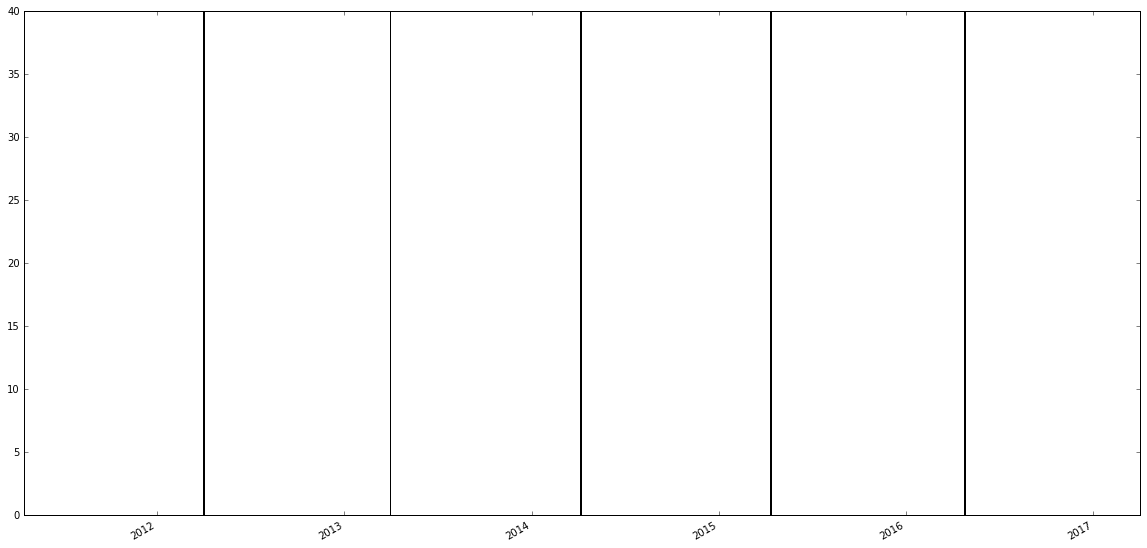

In [34]:
tvFA = []
tvf=[]
for key,value in TVTimeLineFirstAired.items():
    tvFA.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvf.append(value)
plt.bar(tvFA,tvf,color='red')
plt.gcf().autofmt_xdate()


plt.show()

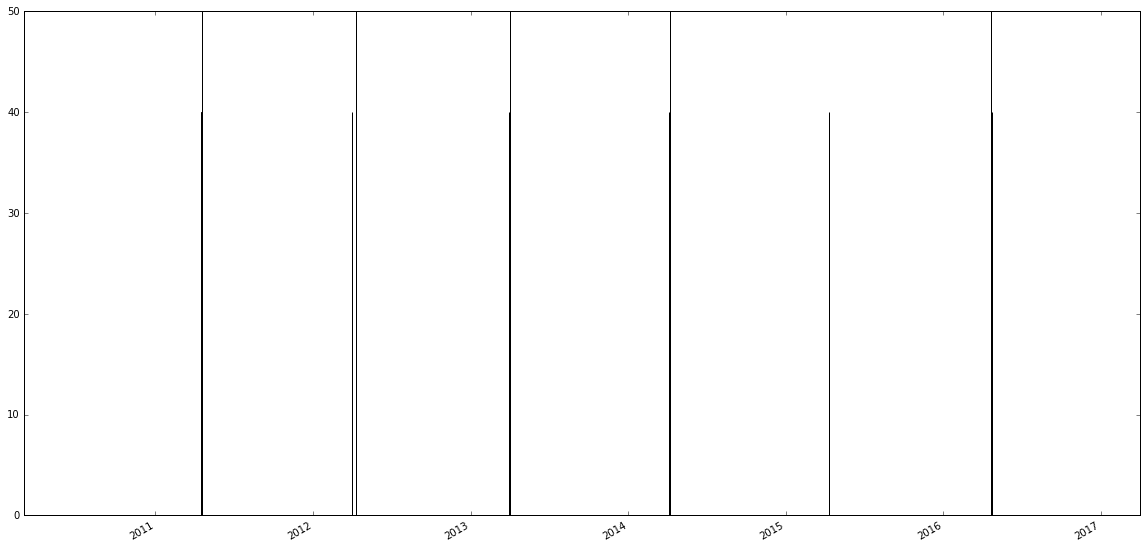

In [35]:

plt.bar(tvFA,tvf,color='red')
plt.gcf().autofmt_xdate()

plt.bar(tvordered,tvo,color='green')
#plt.gcf().autofmt_xdate()

plt.show()

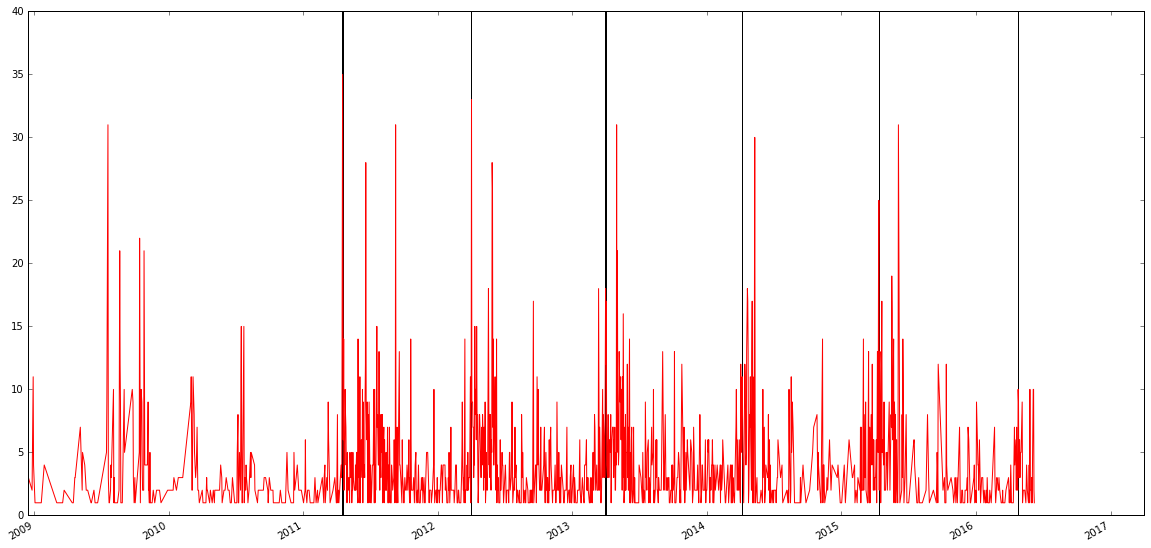

In [36]:
tvdates = []
tvy=[]
for key,value in odtvdaily.items():
    tvdates.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvy.append(value)
plt.plot(tvdates,tvy,color='red')
plt.gcf().autofmt_xdate()


tvFA = []
tvf=[]
for key,value in TVTimeLineFirstAired.items():
    tvFA.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvf.append(value)
plt.bar(tvFA,tvf,color='red')


plt.show()

plt.show()

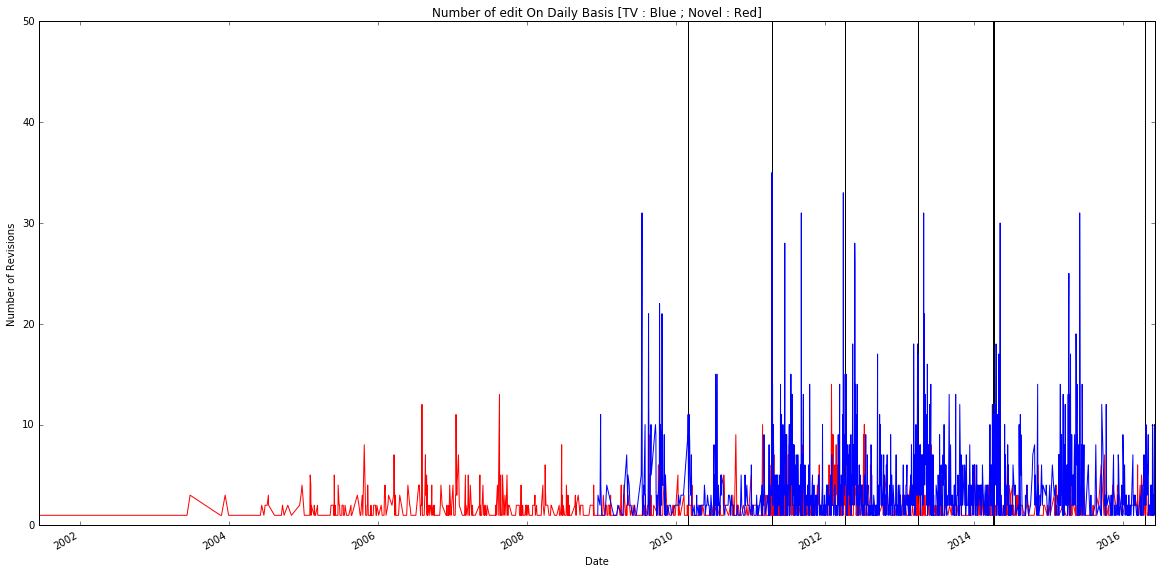

In [37]:
# http://stackoverflow.com/a/22276109


dates = []
y=[]
for key,value in odbookdaily.items():
    dates.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    y.append(value)
plt.plot(dates,y,color='Red')
plt.gcf().autofmt_xdate()

tvdates = []
tvy=[]
for key,value in odtvdaily.items():
    tvdates.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvy.append(value)
plt.plot(tvdates,tvy,color='Blue')
plt.gcf().autofmt_xdate()

tvordered = []
tvo=[]
for key,value in odTVTimeLineordered.items():
    tvordered.append(datetime.datetime.strptime(key, "%Y-%m-%d"))
    tvo.append(value)
plt.bar(tvordered,tvo,color='green')
plt.gcf().autofmt_xdate()

#labels
plt.xlabel("Date")
plt.ylabel("Number of Revisions")

#title
plt.title("Number of edit On Daily Basis [TV : Blue ; Novel : Red]")

plt.show()

In [38]:
TVTimeLine = {}
TVTimeLine["season1"]={"ordered":"03/02/2010","FirstAired":"04/17/2011","LastAired":"06/19/2011"}
TVTimeLine["season2"]={"ordered":"04/19/2011","FirstAired":"04/01/2012","LastAired":"06/03/2012"}
TVTimeLine["season3"]={"ordered":"04/10/2012","FirstAired":"03/31/2013","LastAired":"06/09/2013"}
TVTimeLine["season4"]={"ordered":"04/02/2013","FirstAired":"04/06/2014","LastAired":"06/15/2014"}
TVTimeLine["season5"]={"ordered":"04/08/2014","FirstAired":"04/12/2015","LastAired":"06/14/2015"}
TVTimeLine["season6"]={"ordered":"04/08/2014","FirstAired":"04/24/2016","LastAired":"06/26/2016"}
TVTimeLine["season7"]={"ordered":"04/21/2016","FirstAired":"2017","LastAired":"2017"}

In [39]:
TVTimeLineordered = {}
TVTimeLineordered["03-02-2010"]= 100
TVTimeLineordered["04-19-2011"]= 100
TVTimeLineordered["04-10-2012"]= 100
TVTimeLineordered["04-02-2013"]= 100
TVTimeLineordered["04-08-2014"]= 100
TVTimeLineordered["04-08-2014"]= 100
TVTimeLineordered["04-21-2016"]= 100

In [40]:
print(TVTimeLineordered)

{'03-02-2010': 100, '04-19-2011': 100, '04-21-2016': 100, '04-02-2013': 100, '04-10-2012': 100, '04-08-2014': 100}


Future Direction  : 
* Add few more data points like views , category etc
* Create it as a web application where user can provide Wikipedia Page name and it will create an automatic report with Graphs and important fact about the page 
* Also, enahanced it as a comparison application, where two pages can be compared on exploratary data analysis viepoint by click of a button . 

Thanks :
1. Jonthan Morgan  (Instructor )
2. Ray Yong (Teaching Assistant) 

# TO DO  -

* No revision in month of     "2009-02":  TV series .  and Book Series  series  ?
* Find Anonyms  edits (With User ID - )
* Graph Anonyms edits 
* Number of common contributor 


# Reference 

##  APPENDIX 

Line Graphs 

[('2001', 1), ('2002', 1), ('2003', 11), ('2004', 38), ('2005', 145), ('2006', 179), ('2007', 210), ('2008', 152), ('2009', 178), ('2010', 142), ('2011', 393), ('2012', 484), ('2013', 204), ('2014', 204), ('2015', 159), ('2016', 72)]


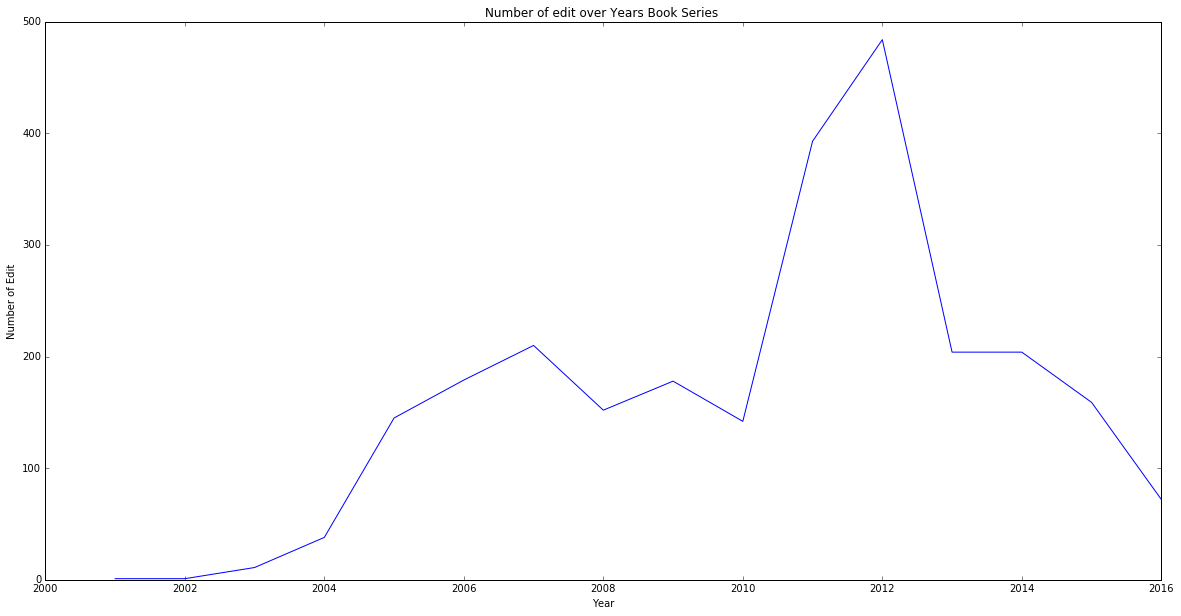

In [41]:
# http://stackoverflow.com/a/37266356 

bookyear = sorted(bookyears.items())  # sorted by key, return a list of tuples
x, y = zip(*bookyear) # unpack a list of pairs into two tuples
print(bookyear)
plt.plot(x,y)

#labels
plt.xlabel("Year")
plt.ylabel("Number of Edit")

#title
plt.title("Number of edit over Years Book Series ")

# fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

plt.show()

[('2008', 21), ('2009', 331), ('2010', 308), ('2011', 989), ('2012', 1065), ('2013', 1044), ('2014', 735), ('2015', 797), ('2016', 264)]


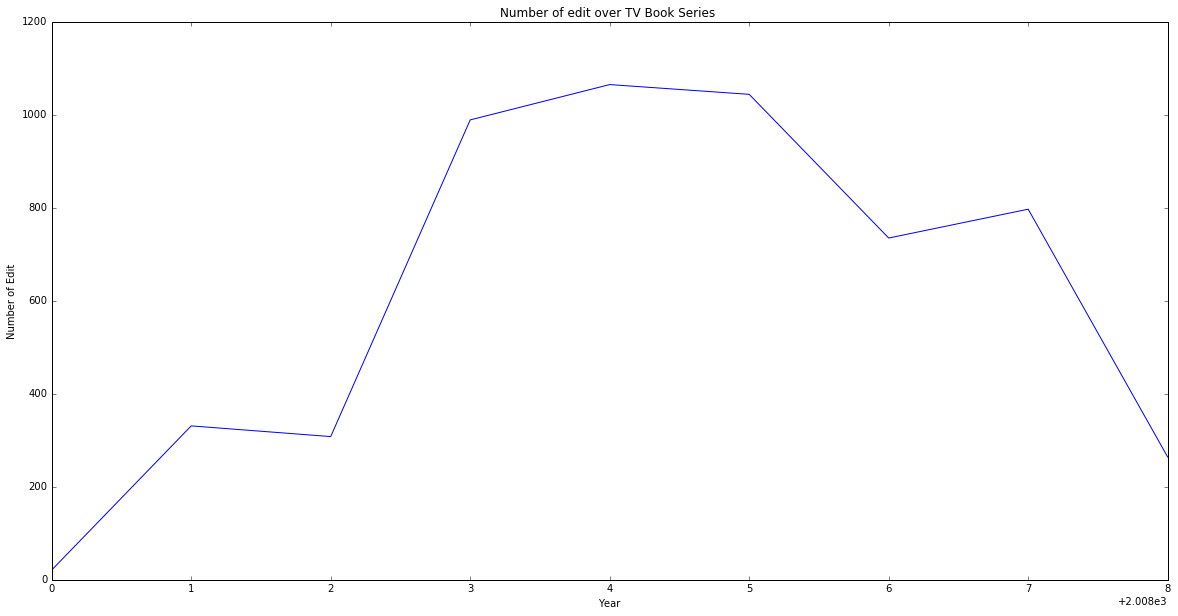

In [42]:
# http://stackoverflow.com/a/37266356 

tvyear = sorted(tvyears.items())  # sorted by key, return a list of tuples
print(tvyear)
x, y = zip(*tvyear) # unpack a list of pairs into two tuples
plt.plot(x,y)

#labels
plt.xlabel("Year")
plt.ylabel("Number of Edit")

#title
plt.title("Number of edit over TV Book Series ")

# fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

plt.show()